# `PySim` Example: Knee Jerk Model

This notebook demonstrates how to use `PySim` to run a Simulink model from Python.

## The Model

Here, we will use a simple model of the knee jerk (myotatic) reflex (shown 
below). This model aims to predict the angular displacement of the knee joint
in response to a sudden application of force to the patella tendon - modeled
as a step moment at the knee joint.

<img src="assets/myotatic-reflex.png" width="400" style="display: block; margin-left: auto; margin-right: auto;">

The following equation describes the dynamics of the knee joint:
$$
M(t) = m_{leg} \cdot L_{leg}^2 \cdot \ddot{\theta}(t) 
+ \beta \cdot \ddot{\theta}(t) 
+ K_\theta \cdot \theta(t)
$$
Where $M(t)$ is the moment applied to the knee joint, $\theta(t)$ is the angular
displacement of the knee joint, $m_{leg}$ is the mass of the leg, $L_{leg}$ is
the length of the leg, $\beta$ is the damping coefficient, and $K_\theta$ is the
stiffness of the knee joint.

The model is implemented in Simulink as shown below:

<img src="assets/knee-jerk-v1.png" width="600" style="display: block; margin-left: auto; margin-right: auto;">

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Import Simulink class
from pysim import Simulink, whereis_knee_jerk_model, plot

In [3]:
# Get path to knee jerk model
path = whereis_knee_jerk_model()

# Create Simulink object
model = Simulink(
    path, 
    outvars=['theta_deg'],
    connect=True
)

Connecting to MATLAB engine...

Loading model...

In [4]:
# Define nominal parameters
params = {
    'K': 1,    # N.m/rad
    'beta': 1, # N.m.s/rad
    'M': 10,   # N.m
    'm': 5,    # kg
    'L': 0.5,  # m
}

# Set parameters
model.set_params(params)

# Run model
out = model.run(start=0, stop=60)

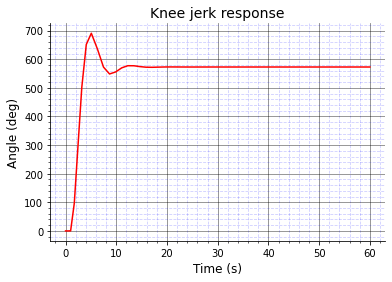

In [7]:
plot(
    x=out['tout'],
    y=out['theta_deg'],
    title='Knee jerk response',
    xlabel='Time (s)',
    ylabel='Angle (deg)'
);